0 0 /Users/kipp/STB/output/path_rel_G-K-Kprime_test_kpts_00/hall_cond.npy
0.1000E+02
1 0 /Users/kipp/STB/output/path_rel_G-K-Kprime_test_kpts_10/hall_cond.npy
0.1000E+03
2 0 /Users/kipp/STB/output/path_rel_G-K-Kprime_test_kpts_20/hall_cond.npy
0.3000E+03
0 1 /Users/kipp/STB/output/path_rel_G-K-Kprime_test_kpts_01/hall_cond.npy
0.1000E+02
1 1 /Users/kipp/STB/output/path_rel_G-K-Kprime_test_kpts_11/hall_cond.npy
0.1000E+03
2 1 /Users/kipp/STB/output/path_rel_G-K-Kprime_test_kpts_21/hall_cond.npy
0.3000E+03


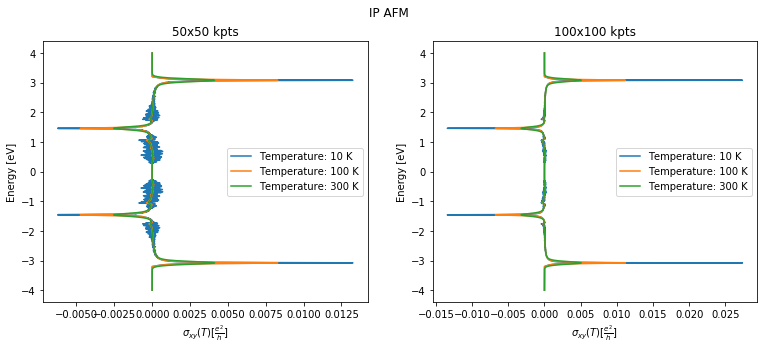

In [70]:
key = 'anticol_theta'
rotation = 'scancol'
rotation2 = 'scancolflip'
seedfname = "path_rel_G-K-Kprime_test_kpts"
seedfnamesq = 'sq_fill_anticol'
save_str = seedfname + '_' + key + '_' + rotation
prefix = "/Users/kipp/STB/output/"
prefix_stb = "/Users/kipp/STB/"
prefix_inis = "/Users/kipp/STB/inis/"
save_prefix = "/output/" + seedfname
magtype = 'anticol'
label = ["$\Gamma$", "$K^{'}$", "K", "$\Gamma$"]
plotlables = ['50x50 kpts','100x100 kpts']
#fname = seedfname + '_' + key + '_' + rotation
fname = seedfname
k = 20
key = 'temperature'
kppd = np.zeros(2,dtype = int)
pattern = key + "\s*=\s*['a-z]+|" + key + "\s*=\s*(\d+(.\d*)+(.\d*)E\+\d\d)|" + key + "\s*=\s*"

fig,ax = plt.subplots(nrows=1,ncols = 2,figsize = (2*6.4,4.8))
fig.suptitle('IP AFM')

for numax,axes in enumerate(ax):
    axes.set_title(plotlables[numax])
    axes.set_xlabel(r'$\sigma_{xy} (T) [\frac{e^2}{h}]$')
    axes.set_ylabel('Energy [eV]')
    axes.xaxis.set_major_formatter(plt.ScalarFormatter(useOffset = True))
    axes.xaxis.get_major_formatter().set_scientific(True)
    axes.xaxis.get_major_formatter().set_powerlimits(lims = (-3,4))

    for l in range(3):
    #print(prefix + fname + '_{:02}/'.format(j) + 'hall_cond_iter={:05}.npy'.format(j))
        loadstr = prefix + fname + '_{0}{1}/hall_cond.npy'.format(l,numax) 
        Eloadstr = prefix + fname + '_{0}{1}/hall_cond_E.npy'.format(l,numax) 
        hc = np.load(loadstr)
        hc_E = np.load(Eloadstr)
        count = 0
        with open(prefix + fname + '_{0}{1}'.format(l,numax)  + 'setup.cfg','r+') as fin:
            for num,line in enumerate(fin,1):
                s = re.search(pattern,line)
                if s!=None:
                    if s.group(2)!=None:
                        kppd[count] = float(s.group(1))
                        count +=1
        axes.plot(hc,hc_E,label = 'Temperature: {} K'.format(kppd[0]))
    axes.legend()
with PdfPages("/Users/kipp/STB/weyl_figures/Weyl_figures/" + 'ip_afm_Convergence_Behaviour_Temperature') as pdf:
    pdf.savefig(fig)




#


In [44]:
prefix + fname + '_{0}{1}/hall_cond.npy'.format(0,1) 

'/Users/kipp/STB/output/path_rel_G-K-Kprime_test_kpts_01/hall_cond.npy'

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import re
from matplotlib.backends.backend_pdf import PdfPages

In [39]:
print(s.group(1)[0])

0


In [73]:
numax = 0
l = 1
loadstr = prefix + fname + '_{0}{1}/DOS_up.npy'.format(l,numax) 
loadstr2 = prefix + fname + '_{0}{1}/DOS_down.npy'.format(l,numax) 
Eloadstr = prefix + fname + '_{0}{1}/DOS_E.npy'.format(l,numax) 
DOS_up = np.load(loadstr)
DOS_down = np.load(loadstr2)
DOS_E = np.load(Eloadstr)


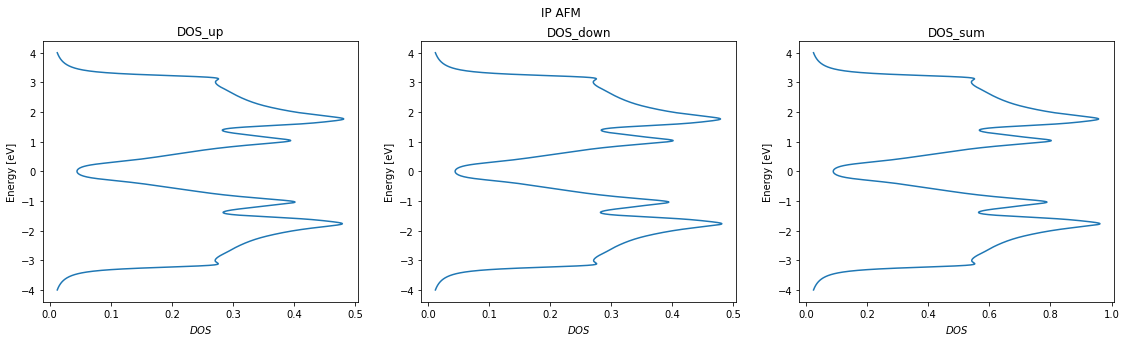

In [76]:
fig,ax = plt.subplots(nrows=1,ncols = 3,figsize = (3*6.4,4.8))
fig.suptitle('IP AFM')
plotlables = ['DOS_up','DOS_down','DOS_sum']
for numax,axes in enumerate(ax):
    axes.set_title(plotlables[numax])
    axes.set_xlabel(r'$DOS$')
    axes.set_ylabel('Energy [eV]')
    axes.xaxis.set_major_formatter(plt.ScalarFormatter(useOffset = True))
    axes.xaxis.get_major_formatter().set_scientific(True)
    axes.xaxis.get_major_formatter().set_powerlimits(lims = (-3,4))
ax[0].plot(DOS_up,DOS_E)
ax[1].plot(DOS_down,DOS_E)
ax[2].plot(DOS_down+DOS_down,DOS_E)
